Exploratory Data Analysis for Tennis Rackets 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats

In [2]:
df_rackets = pd.read_csv('racquet_data.csv')
df_rackets

,Manufacturer,Name,Headsize (sq_inch),Length (inn),Strung Weight (oz),Balance,Swingweight,Beamwidth,Power Level,Stiffness,Stringing Pattern
0,Babolat,Babolat Aero 112,112,27.5,10.2,6pts HH,346,0.0,High,64,16 Mains/19 Crosses
1,Babolat,Babolat Pure Storm Team,98,27.0,11.0,3pts HL,326,21.0,Low-Medium,64,16 Mains/20 Crosses
2,Babolat,Babolat Aero Blast,112,27.5,10.2,6pts HH,340,0.0,High,65,16 Mains/19 Crosses
3,Babolat,Babolat Pure Storm Team MP,103,27.0,10.7,1pts HH,329,22.5,Medium,67,16 Mains/20 Crosses
4,Babolat,Babolat Pure Control Team Plus Midplus,100,27.5,11.6,8pts HL,338,21.5,Low-Medium,64,16 Mains/20 Crosses
...,...,...,...,...,...,...,...,...,...,...,...
1033,Volkl,Volkl V-Cell 3 - 2021,110,27.8,10.0,2pts HL,313,27.0,Medium-High,69,16 Mains/19 Crosses
1034,Volkl,Volkl V-Cell 5 - 2021,100,27.0,9.8,1pts HL,287,24.5,Low-Medium,69,16 Mains/18 Crosses
1035,Volkl,Volkl V-Cell V1 OS - 2021,110,27.6,10.5,5pts HL,310,23.0,Medium-High,68,16 Mains/19 Crosses
1036,Volkl,Volkl V-Cell V1 MP - 2021,102,27.0,10.6,4pts HL,302,22.0,Low-Medium,68,16 Mains/19 Crosses


Data Cleaning

7.6% of the power level data is missing

In [3]:
#missing data 

total = df_rackets.isnull().sum().sort_values(ascending=False)
percent = (df_rackets.isnull().sum()/df_rackets.isnull().count()).sort_values(ascending = True)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)



,Total,Percent
Power Level,65,0.06262
Manufacturer,0,0.00000
Name,0,0.00000
Headsize (sq_inch),0,0.00000
Length (inn),0,0.00000
Strung Weight (oz),0,0.00000
Balance,0,0.00000
Swingweight,0,0.00000
Beamwidth,0,0.00000
Stiffness,0,0.00000


Pre-Processing

In [4]:
df_rackets = df_rackets.drop(df_rackets.loc[df_rackets["Power Level"].isnull()].index)
df_rackets.isnull().sum().max() #just checking that there's no missing data missing...

0

In [5]:
df_rackets

,Manufacturer,Name,Headsize (sq_inch),Length (inn),Strung Weight (oz),Balance,Swingweight,Beamwidth,Power Level,Stiffness,Stringing Pattern
0,Babolat,Babolat Aero 112,112,27.5,10.2,6pts HH,346,0.0,High,64,16 Mains/19 Crosses
1,Babolat,Babolat Pure Storm Team,98,27.0,11.0,3pts HL,326,21.0,Low-Medium,64,16 Mains/20 Crosses
2,Babolat,Babolat Aero Blast,112,27.5,10.2,6pts HH,340,0.0,High,65,16 Mains/19 Crosses
3,Babolat,Babolat Pure Storm Team MP,103,27.0,10.7,1pts HH,329,22.5,Medium,67,16 Mains/20 Crosses
4,Babolat,Babolat Pure Control Team Plus Midplus,100,27.5,11.6,8pts HL,338,21.5,Low-Medium,64,16 Mains/20 Crosses
...,...,...,...,...,...,...,...,...,...,...,...
1033,Volkl,Volkl V-Cell 3 - 2021,110,27.8,10.0,2pts HL,313,27.0,Medium-High,69,16 Mains/19 Crosses
1034,Volkl,Volkl V-Cell 5 - 2021,100,27.0,9.8,1pts HL,287,24.5,Low-Medium,69,16 Mains/18 Crosses
1035,Volkl,Volkl V-Cell V1 OS - 2021,110,27.6,10.5,5pts HL,310,23.0,Medium-High,68,16 Mains/19 Crosses
1036,Volkl,Volkl V-Cell V1 MP - 2021,102,27.0,10.6,4pts HL,302,22.0,Low-Medium,68,16 Mains/19 Crosses


In [6]:
# descriptive statistics summary; beamwidth shows several values with 0, need to drop columns; 
df_rackets["Beamwidth"].describe()

count    973.000000
mean      18.996300
std        9.952952
min        0.000000
25%       20.000000
50%       23.000000
75%       26.000000
max       33.000000
Name: Beamwidth, dtype: float64

In [7]:
df_rackets = df_rackets.drop(df_rackets.loc[df_rackets["Beamwidth"] == 0].index)
df_rackets = df_rackets.drop(df_rackets.loc[df_rackets["Stiffness"] == 0].index)
df_rackets.loc[df_rackets['Manufacturer']=='["Dunlop', 'Manufacturer'] = 'Dunlop'
df_rackets.loc[df_rackets['Manufacturer']=='2013/Tecnifibre', 'Manufacturer'] = 'Tecnifibre'



df_rackets["HL or HH"] = np.where(df_rackets['Balance'].str.contains("HL"), 'Head Light', 'Head Heavy')
df_rackets["Points of Balance"] = df_rackets['Balance'].str.split("").str[1]
df_rackets

,Manufacturer,Name,Headsize (sq_inch),Length (inn),Strung Weight (oz),Balance,Swingweight,Beamwidth,Power Level,Stiffness,Stringing Pattern,HL or HH,Points of Balance
1,Babolat,Babolat Pure Storm Team,98,27.0,11.0,3pts HL,326,21.0,Low-Medium,64,16 Mains/20 Crosses,Head Light,3
3,Babolat,Babolat Pure Storm Team MP,103,27.0,10.7,1pts HH,329,22.5,Medium,67,16 Mains/20 Crosses,Head Heavy,1
4,Babolat,Babolat Pure Control Team Plus Midplus,100,27.5,11.6,8pts HL,338,21.5,Low-Medium,64,16 Mains/20 Crosses,Head Light,8
7,Babolat,Babolat Pure Storm Tour Plus,98,27.5,11.8,9pts HL,336,21.0,Low,62,16 Mains/20 Crosses,Head Light,9
8,Babolat,Babolat Drive Z Oversize,110,27.5,10.1,5pts HH,327,27.0,Medium-High,64,16 Mains/20 Crosses,Head Heavy,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1033,Volkl,Volkl V-Cell 3 - 2021,110,27.8,10.0,2pts HL,313,27.0,Medium-High,69,16 Mains/19 Crosses,Head Light,2
1034,Volkl,Volkl V-Cell 5 - 2021,100,27.0,9.8,1pts HL,287,24.5,Low-Medium,69,16 Mains/18 Crosses,Head Light,1
1035,Volkl,Volkl V-Cell V1 OS - 2021,110,27.6,10.5,5pts HL,310,23.0,Medium-High,68,16 Mains/19 Crosses,Head Light,5
1036,Volkl,Volkl V-Cell V1 MP - 2021,102,27.0,10.6,4pts HL,302,22.0,Low-Medium,68,16 Mains/19 Crosses,Head Light,4


Univariate Analysis

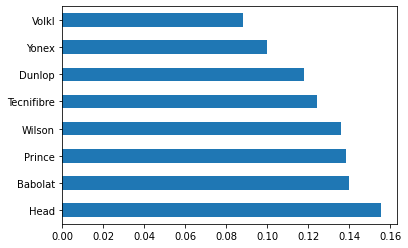

In [8]:
df_rackets['Manufacturer'].value_counts(normalize = True).plot.barh()
plt.show()


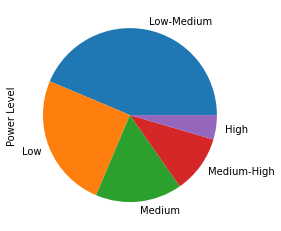

In [9]:
df_rackets['Power Level'].value_counts(normalize = True).plot.pie()
plt.show()


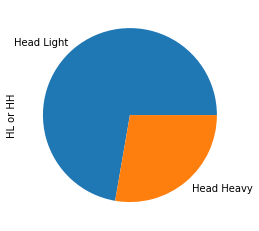

In [10]:
df_rackets["HL or HH"].value_counts(normalize = True).plot.pie()
plt.show()

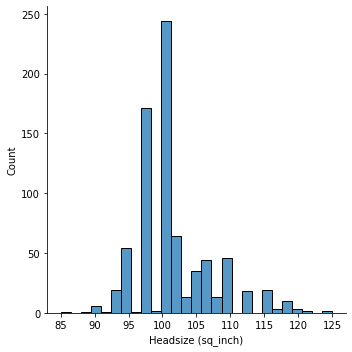

In [11]:
#univeriate analysis on racket specs
sns.displot(df_rackets["Headsize (sq_inch)"])


In [12]:
#skewnness and kurtosis; skewness is a measure of symmetry, kurtosis is a measure of whether the data are heavy-tailed or light-tailed relative to a normal distribution
#skewness shoudl be between -0.5 and 0.5, kurtosis should be between 3 and 7
print("Skewness: %f" % df_rackets["Headsize (sq_inch)"].skew())
print("Kurtosis: %f" % df_rackets["Headsize (sq_inch)"].kurt())

# head_size_scaled = StandardScaler().fit_transform(df_rackets["Headsize (sq_inch)"][:,np.newaxis]);
# low_range = head_size_scaled[head_size_scaled[:,0].argsort()][:10]
# high_range = head_size_scaled[head_size_scaled[:,0].argsort()][-10:]
# print(low_range, high_range)

Skewness: 1.133026
Kurtosis: 1.448643


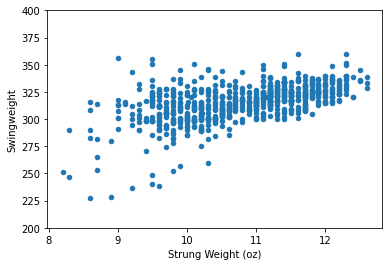

In [13]:
#Bivariate analysis
#scatter plot
var = 'Strung Weight (oz)'
data = pd.concat([df_rackets['Strung Weight (oz)'], df_rackets['Swingweight']], axis=1)
data.plot.scatter(x=var, y='Swingweight', ylim=(200,400));


(-0.5, 4.5, 70.0, 150.0)

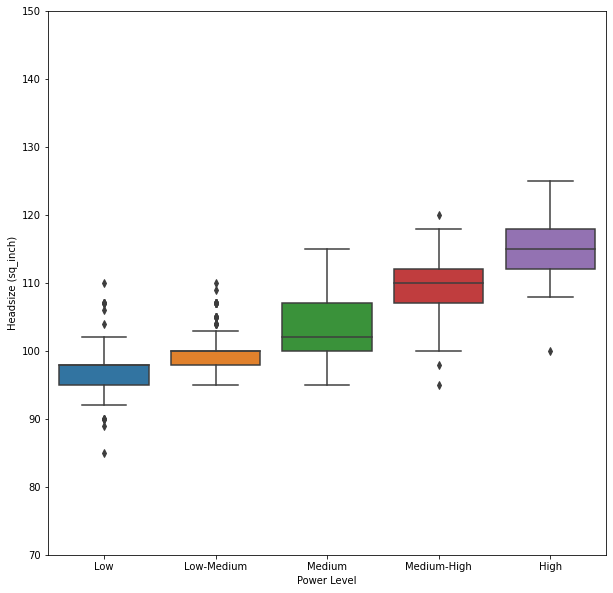

In [14]:
#box plot for categorial data
var = 'Power Level'
data = pd.concat([df_rackets['Power Level'], df_rackets['Headsize (sq_inch)']], axis=1)
f, ax = plt.subplots(figsize=(10, 10))
fig = sns.boxplot(x=var, y="Headsize (sq_inch)", data=data, order = ['Low', 'Low-Medium', 'Medium', 'Medium-High','High'])
fig.axis(ymin = 70, ymax = 150)

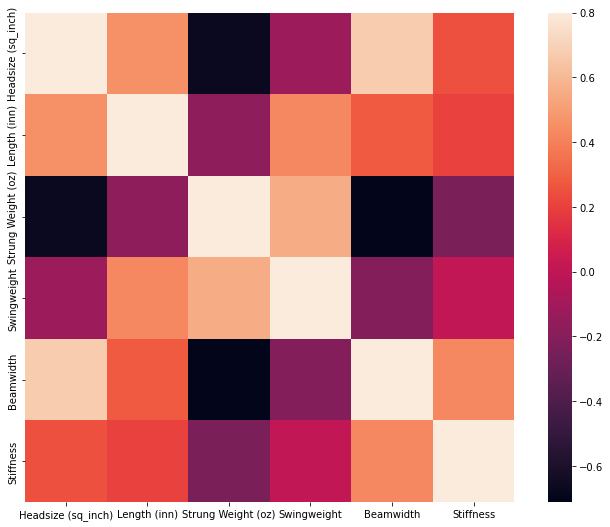

In [15]:
#Multivariate analysis
#correlation matrix
corr_mat = df_rackets.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corr_mat, vmax=.8, square=True);
#We can see that Headsize and Beam width are highly correlated, and least correlated with strung weight

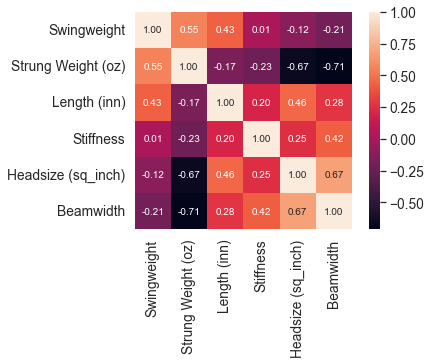

In [16]:
#Swing weight correlation matrix
k = 6
cols = corr_mat.nlargest(k, 'Swingweight')['Swingweight'].index
cm = np.corrcoef(df_rackets[cols].values.T)
sns.set(font_scale = 1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

c:\Users\BetaKraken\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


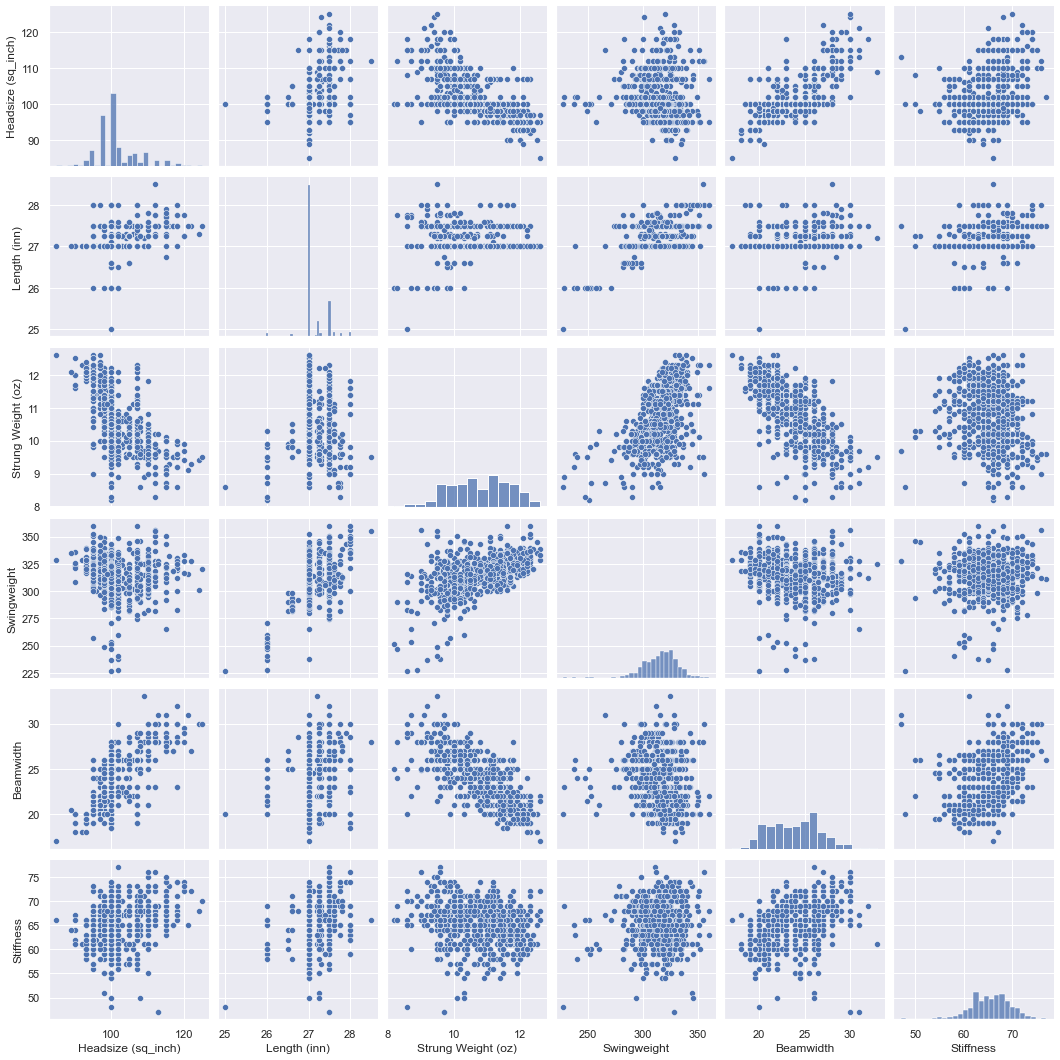

In [17]:
#scatterplot with pairplot to look at correlation
sns.set()
cols = ['Headsize (sq_inch)', 'Length (inn)', 'Strung Weight (oz)', 'Swingweight', 'Beamwidth', 'Stiffness']
sns.pairplot(df_rackets[cols], size = 2.5)
plt.show()

All numeric features standardized - Ready for PCA

In [18]:
# #scale all numeric features
# scale_features = df_rackets.copy()
# col_names = ['Headsize (sq_inch)', 'Length (inn)', 'Strung Weight (oz)', 'Swingweight', 'Beamwidth', 'Stiffness']
# features = scale_features[col_names]
# scaler = StandardScaler().fit(features.values)
# features = scaler.transform(features.values)

# scale_features[col_names] = features


# scale_features

PCA and Model Evaluation

In [19]:
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt

plt.style.use('ggplot')

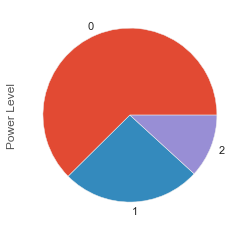

In [20]:
col_names = ['Headsize (sq_inch)', 'Length (inn)', 'Strung Weight (oz)', 'Swingweight', 'Beamwidth', 'Stiffness']

# #convert Low-medium to low and high-medium to high, and convert to 0, 1, 2 for Low, Medium, and High
df_rackets.loc[(df_rackets['Power Level']=='Low-Medium') & (df_rackets["HL or HH"] =='Head Light'), 'Power Level'] = 'Low'
df_rackets.loc[(df_rackets['Power Level']=='Low-Medium') & (df_rackets["HL or HH"] =='Head Heavy'), 'Power Level'] = 'Medium'

df_rackets.loc[(df_rackets['Power Level']=='Medium-High') & (df_rackets["HL or HH"] =='Head Light'), 'Power Level'] = 'Medium'
df_rackets.loc[(df_rackets['Power Level']=='Medium-High') & (df_rackets["HL or HH"] =='Head Heavy'), 'Power Level'] = 'High'

# df_rackets.loc[df_rackets['Power Level']=='Medium-High', 'Power Level'] = 'High'

df_rackets.loc[df_rackets['Power Level']=='Low', 'Power Level'] = 0
df_rackets.loc[df_rackets['Power Level']=='Medium', 'Power Level'] = 1
df_rackets.loc[df_rackets['Power Level']=='High', 'Power Level'] = 2


df_rackets.to_csv('racket_data_cleaned.csv')
df_rackets['Power Level'].value_counts(normalize = True).plot.pie()
plt.show()


X = df_rackets[col_names].values
y = df_rackets['Power Level'].values.astype('int')



In [21]:
#split data into training and test sets
from sklearn.model_selection import train_test_split
seed = 1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
kfold = model_selection.KFold(n_splits=10)


In [22]:
#scale the data for training set and apply to test set
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)

X_test = sc.transform(X_test)

In [23]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [24]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

In [25]:
results = []
names = []
scoring = 'accuracy'
for name, model in models:
        kfold = model_selection.KFold(n_splits=10)
        cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)

LR: 0.773242 (0.051642)
LDA: 0.766843 (0.052908)
KNN: 0.731068 (0.059920)
CART: 0.700159 (0.041606)
NB: 0.770095 (0.046319)
SVM: 0.768403 (0.046167)


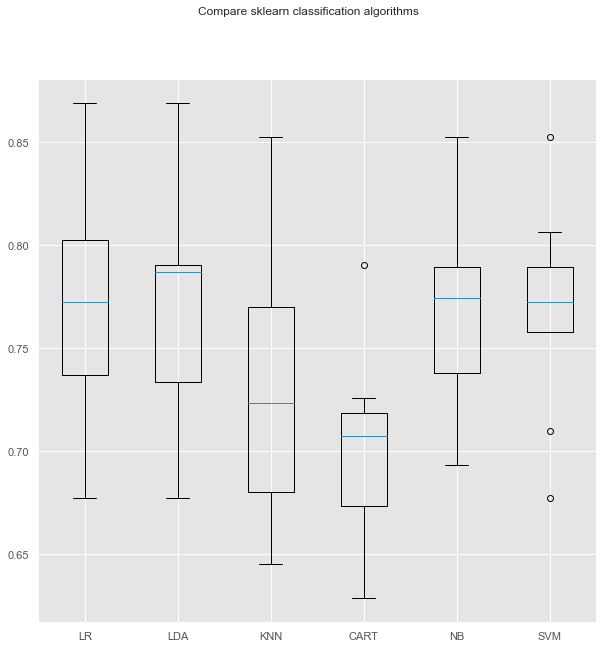

In [26]:
fig = plt.figure(figsize=(10,10))
fig.suptitle('Compare sklearn classification algorithms')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [27]:
brand_ops =df_rackets["Manufacturer"].unique().tolist()

print(brand_ops)

['Babolat', 'Wilson', 'Head', 'Prince', 'Dunlop', 'Yonex', 'Tecnifibre', 'Volkl']


In [28]:
def more_than_3(a):
    
    if a["Name"].count() > 3:
        return True
    else:
        return False

In [29]:
def recommend(brand_list,head, strungw, swingw, power_level):
    col_names = ['Name','Manufacturer',  'Headsize (sq_inch)', 'Length (inn)', 'Strung Weight (oz)', 'Swingweight', 'Beamwidth', 'Stiffness']

    df = pd.DataFrame(columns= ['Name','Manufacturer',  'Headsize (sq_inch)', 'Length (inn)', 'Strung Weight (oz)', 'Swingweight', 'Beamwidth', 'Stiffness'])
    for brand in brand_list:
        x = df_rackets.loc[(df_rackets["Power Level"] == power_level) & (df_rackets["Manufacturer"] == brand)]
        y = x.loc[x["Headsize (sq_inch)"].between(head-0.5*6.2, head+0.5*6.2)]
        z = y.loc[y["Strung Weight (oz)"].between(strungw-0.5*0.95, strungw+0.5*0.95)]
        a = z.loc[z["Swingweight"].between(swingw-0.5*18.5, swingw+0.5*18.5)]
        
        if more_than_3(a):
            df = pd.concat([df, a[col_names].head(3)])

        elif more_than_3(z):
            df = pd.concat([df,z[col_names].head(3)])
        elif more_than_3(y):
            df = pd.concat([df,y[col_names].head(3)])
        else:
            df = pd.concat([df,x[col_names].head(3)])
          
    return df
            
        
    
                
        
    
        

In [30]:
#testing a recommendation system based on the user's input and standard deviation
brand_list = ["Wilson", "Dunlop", "Babolat"]
input_head = 98
strung_weight = 10.4
swing_weight = 294
power_level = 1

# df = pd.DataFrame(columns= ['Name','Manufacturer',  'Headsize (sq_inch)', 'Length (inn)', 'Strung Weight (oz)', 'Swingweight', 'Beamwidth', 'Stiffness'])
print(recommend(brand_list, input_head, strung_weight, swing_weight, power_level))
# print(df_rackets)

# x = df_rackets.loc[(df_rackets["Power Level"] == 0) & (df_rackets["Manufacturer"] == "Wilson") ]

# y = x.loc[x["Headsize (sq_inch)"].between(input_head-1*6.2, input_head+1*6.2)]

# z = y.loc[y["Strung Weight (oz)"].between(strung_weight-0.5*0.95, strung_weight+0.5*0.95)]

# a = z.loc[z["Swingweight"].between(swing_weight-18.5, swing_weight+18.5)]

# print(type(more_than_3(a)))


# result = pd.concat(df, a[col_names].head(3))
# print(df)
# print(a[col_names].head(3))
# print(x)
# print(z)


                           Name Manufacturer Headsize (sq_inch)  Length (inn)  \
100             Wilson KFive 98       Wilson                 98         27.25   
104             Wilson nTour 95       Wilson                 95         27.25   
144               Wilson KSurge       Wilson                100         27.00   
405            Dunlop M-Fil 400       Dunlop                100         27.25   
412         Dunlop  Aerogel 500       Dunlop                100         27.00   
436   Dunlop Adrenaline Rush 98       Dunlop                 98         27.00   
46         Babolat Drive Z-Tour      Babolat                100         27.00   
76          Babolat Aero Strike      Babolat                100         27.00   
82   Babolat Pure Drive Lite GT      Babolat                100         27.00   

     Strung Weight (oz) Swingweight  Beamwidth Stiffness  
100                10.3         345       26.0        51  
104                10.7         330       22.0        61  
144         